In [25]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.text import TextCollection
from nltk.corpus import CategorizedPlaintextCorpusReader

import os
import re

from nltk.corpus import stopwords

eliz_stopwords = ["i",  "me",  "my",  "myself",  "we",  "our",  "ours",  "ourselves",  "you",  "your",  "yours",  "yourself",  "yourselves",  "he",  "him",  "his",  "himself",  "she",  "her",  "hers",  "herself",  "it",  "its",  "itself",  "they",  "them",  "their",  "theirs",  "themselves",  "what",  "which",  "who",  "whom",  "this",  "that",  "these",  "those",  "am",  "is",  "are",  "was",  "were",  "be",  "been",  "being",  "have",  "has",  "had",  "having",  "do",  "does",  "did",  "doing",  "a",  "an",  "the",  "and",  "but",  "if",  "or",  "because",  "as",  "until",  "while",  "of",  "at",  "by",  "for",  "with",  "about",  "against",  "between",  "into",  "through",  "during",  "before",  "after",  "above",  "below",  "to",  "from",  "up",  "down",  "in",  "out",  "o",  "on",  "off",  "over",  "under",  "again",  "further",  "then",  "once",  "here",  "there",  "when",  "where",  "why",  "how",  "all",  "any",  "both",  "each",  "few",  "more",  "most",  "other",  "some",  "such",  "no",  "nor",  "not",  "only",  "own",  "same",  "so",  "than",  "too",  "very",  "can",  "will",  "just",  "should",  "now",  "art", "doth", "dost", "'ere", "hast", "hath", "hence", "hither", "nigh", "oft", "should'st", "thither", "thee", "thou", "thine", "thy", "'tis", "'twas", "wast", "whence", "wherefore", "whereto", "withal", "would'st", "ye", "yon", "yonder"]
hk_stopwords = ['unto','u','one', 'five','upon','de','also','wee','two','may','many','would','shall','hee','like','three','doe','could','much','every','againe','bee','might','without','well','within','yet','bene','ad','foure','another','whereof','thereof','onely','next','himselfe','thus','hundred','untill','therefore','halfe','cum','selfe','non','ut', 'whole','little','sixe','full','neither','among','last','c','never','la','qui','ii','according','eight','whose','either','per','along','item','al','likewise','mee','whereupon','none','till','able','thousand','self','el','second','que','mine','quae','sunt','et','seven','iii','although','litle','si','notwithstanding','besides','etiam','lesse','e','even','vel','alwayes', 'third','ever','rather','whether','still','otherwise','large','amongst', 'greater','somewhat','ex','least','aforesaid','though','whatsoever','quam', 'ten','whereby','foorth','no', 'n','los','almost','twelve','howbeit','j', 'greatly','ac','yce', 'pro','en','ab','greatest','whereas','hoc','w','beene','doeth','eorum','con','withall','hereafter','moreover','nec','nine','noone','omnes','del','enim','often']
latin_stopwords = ['ab', 'ac', 'ad', 'adhuc', 'aliqui', 'aliquis', 'an', 'ante', 'apud', 'at', 'atque', 'aut', 'autem', 'cum', 'cur', 'de', 'deinde', 'dum', 'ego', 'enim', 'ergo', 'es', 'est', 'et', 'etiam', 'etsi', 'ex', 'fio', 'haud', 'hic', 'iam', 'idem', 'igitur', 'ille', 'in', 'infra', 'inter', 'interim', 'ipse', 'is', 'ita', 'magis', 'modo', 'mox', 'nam', 'ne', 'nec', 'necque', 'neque', 'nisi', 'non', 'nos', 'o', 'ob', 'per', 'possum', 'post', 'pro', 'quae', 'quam', 'quare', 'qui', 'quia', 'quicumque', 'quidem', 'quilibet', 'quis', 'quisnam', 'quisquam', 'quisque', 'quisquis', 'quo', 'quoniam', 'sed', 'si', 'sic', 'sive', 'sub', 'sui', 'sum', 'super', 'suus', 'tam', 'tamen', 'trans', 'tu', 'tum', 'ubi', 'uel', 'uero']
pronouns = ['i', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'me', 'you', 'him', 'her', 'it', 'you', 'us', 'them', 'my', 'your', 'his', 'her', 'its', 'our', 'your', 'their', 'mine', 'yours', 'his', 'hers', 'its', 'ours', 'yours', 'theirs', 'myself', 'yourself', 'himself', 'herself', 'itself', 'ourselves', 'yourselves', 'themselves']
modals = ['shall','shal','shalt','should', 'can', "can't", 'cannot', 'could', 'will','wil', 'would', 'may', 'must', 'might', 'ought', 'need', 'have', 'has']
directives = ['without', 'within', 'there', 'thence','away','est','towards','toward','farre','betweene','wherein','therein']
stop_words = set(stopwords.words('english') + latin_stopwords + eliz_stopwords + hk_stopwords + ['']) - set(pronouns + modals + directives)
stop_words_max = set(stopwords.words('english') + latin_stopwords + eliz_stopwords + hk_stopwords + [''] + pronouns + modals + directives + ['great', 'make', 'good', 'part', 'certain', 'thing'])

# violence flags for pandas conditional formatting
viol_flags = ['violence', 'harm', 'injury', 'injure', 'hurt', 'damage', 'scathe', 'wound', 'maim', 'cripple', 'mutilate', 'cut', 'mangle', 'torture', 'torment', 'wound', 'gash', 'bruise', 'abuse', 
              'bloody', 'bloodshed', 'bloodshedder', 'bloodshedding', 'blood', 'hit', 
              'fight', 'scrap', 'struggle', 'conflict', 'melee', 'brawl', 'combat', 'wrestle', 'wrestler',
              'kill', 'death', 'slay', 'murder', 'assassinate', 'assasin', 'massacre', 'slaughter', 'butcher', 'slaughter', 'manslaughter', 
              'battle', 'war', 'siege', 'attack', 'assault', 'skirmish', 'skirmisher', 'enemy', 'foe', 'hostile', 'army', 'soldier', 'warrior', 'conquer', 'conqueror', 'conquest',
              'detain', 'capture', 'captive', 'imprison', 'gaol', 'prisoner', 'slave', 'enslave',
              'shoot', 'shot',  'blast', 'burn', 'fire', 'blaze',
              'cruel', 'cruelty', 'destroy', 
              'weapon', 'arrow', 'crossbow', 'dart', 'javelin', 'mace', 'club', 'sword', 'lance', 'spear', 'rapier', 'pike', 'target', 'buckler', 'falchion', 'halberd', 'partisan', 
              'musket', 'gun', 'gunner', 'bullet', 'caliver', 'culverin', 'harquebus', 'harquebusier', 'saker', 'cannon']# 'die' is filtered out on account of dyes

In [26]:
#create a formatted filter:
for v in viol_flags:
    print('%s|' %v, end = '')

violence|harm|injury|injure|hurt|damage|scathe|wound|maim|cripple|mutilate|cut|mangle|torture|torment|wound|gash|bruise|abuse|bloody|bloodshed|bloodshedder|bloodshedding|blood|hit|fight|scrap|struggle|conflict|melee|brawl|combat|wrestle|wrestler|kill|death|slay|murder|assassinate|assasin|massacre|slaughter|butcher|slaughter|manslaughter|battle|war|siege|attack|assault|skirmish|skirmisher|enemy|foe|hostile|army|soldier|warrior|conquer|conqueror|conquest|detain|capture|captive|imprison|gaol|prisoner|slave|enslave|shoot|shot|blast|burn|fire|blaze|cruel|cruelty|destroy|weapon|arrow|crossbow|dart|javelin|mace|club|sword|lance|spear|rapier|pike|target|buckler|falchion|halberd|partisan|musket|gun|gunner|bullet|caliver|culverin|harquebus|harquebusier|saker|cannon|

In [2]:
# unfiltered corpuses
corpus_root = 'text-data/Cambridge_MacLehose_FineReader_OCR_trimmed'
hakluyt = PlaintextCorpusReader(corpus_root, '.*')
hakluyt_col = TextCollection(hakluyt)

#select stopword threshold
#stop_words_enc = []
stop_words_enc = stop_words_max
#stop_words_enc = stop_words
AM_cat_root = 'text-data/CC_ML_FR_trimmed_MAlem_AMER_cat_mod/'
#setup expl&enc-tagged categorized corpus - working, if not the most efficient solution via catmap rather than pattern

filelist = os.listdir(AM_cat_root)
fileid_cat = {}
for file in filelist:
    fileid_cat[file] = re.findall(r'(expl_y|expl_n|enc_full|enc_part|enc_min|enc_none)', file)
hakluyt_AM_cat = CategorizedPlaintextCorpusReader(AM_cat_root, '.*', cat_map = fileid_cat)

#print('list of categories: ', hakluyt_AM_cat.categories(), 'number of files: ', len(hakluyt_AM_cat.fileids()))

hakluyt_AM_cat_enc_fd = nltk.ConditionalFreqDist((enc, word)
                                                 for enc in ['enc_full', 'enc_min', 'enc_none', 'enc_part']
                                                 for word in hakluyt_AM_cat.words(categories = enc)
                                                if word.isalpha() and word not in stop_words_enc)

# plaintext corpus for just full/part enc
AM_cat_enc_root = 'text-data/CC_ML_FR_trimmed_MAlem_AMER_cat_mod_enc_full_part/'

hakluyt_AM_enc_part_full = PlaintextCorpusReader(AM_cat_root, r'.*(enc_full|enc_part).*')
hakluyt_AM_enc_part_full_fd = nltk.FreqDist(word for word in hakluyt_AM_enc_part_full.words() if word.isalpha() and word not in stop_words_enc)

#plaintext corpus for AMER total
AMER_root = 'text-data/CC_ML_FR_trimmed_morphad_lem_AMER/'

hakluyt_AMER = PlaintextCorpusReader(AMER_root, '.*')
hakluyt_AMER_fd = nltk.FreqDist(word for word in hakluyt_AMER.words() if word.isalpha() and word not in stop_words_enc)

AMER_col = TextCollection(hakluyt_AMER)
enc_full_col = TextCollection(hakluyt_AM_cat.categories('enc_full'))
enc_sig_col = TextCollection(hakluyt_AM_enc_part_full)

<FreqDist with 21450 samples and 319904 outcomes>


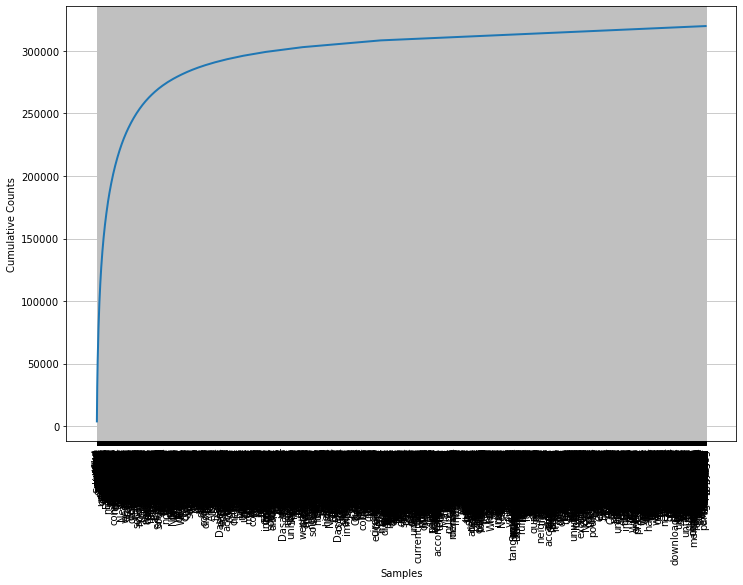

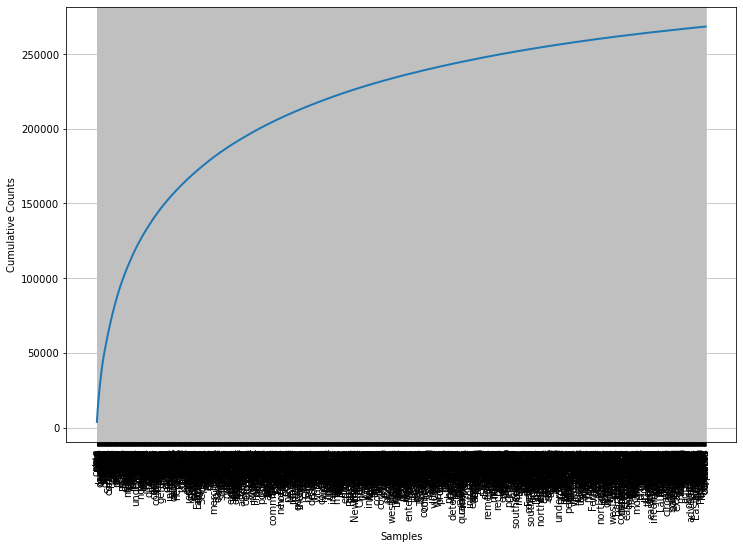

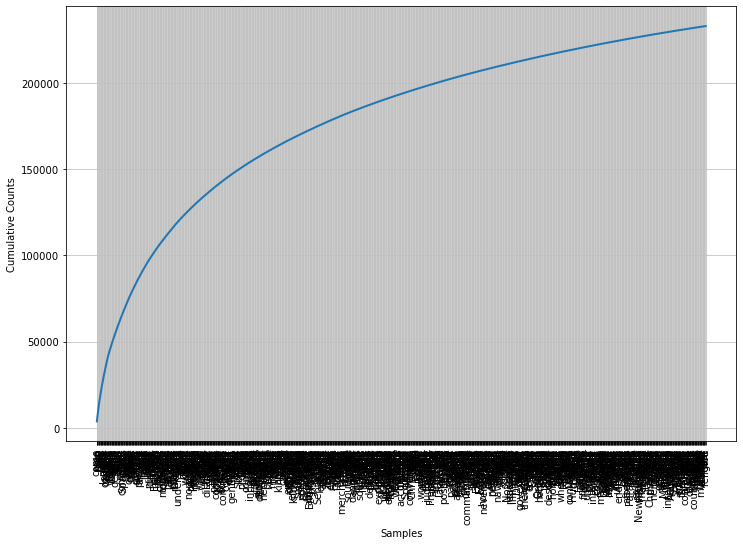

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [22]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

print(hakluyt_AMER_fd)
hakluyt_AMER_fd.plot(21450, cumulative = True)
hakluyt_AMER_fd.plot(2100, cumulative = True)
hakluyt_AMER_fd.plot(1000, cumulative = True)

Build one-file corpuses for total & AMER for textplot

In [49]:
in_path = 'text-data/CC_ML_FR_trimmed_morphad_lem/'
out_path = 'Gephi/'

filelist = os.scandir(in_path)
for entry in filelist:
    with open(entry.path, 'r', encoding="utf8") as chapter:
        with open((out_path + '/' + 'Hakluyt_all'), 'a', encoding="utf8") as text_dump:
            text_dump.write(chapter.read())

In [ ]:
in_path = 'text-data/CC_ML_FR_trimmed_morphad_lem_AMER/'
out_path = 'Gephi/'

filelist = os.scandir(in_path)
for entry in filelist:
    with open(entry.path, 'r', encoding="utf8") as chapter:
        with open((out_path + '/' + 'Hakluyt_AMER.txt'), 'a', encoding="utf8") as text_dump:
            text_dump.write(chapter.read())

In [ ]:
in_path = 'text-data/CC_ML_FR_trimmed_MAlem_AMER_cat_mod_enc_full_part/'
out_path = 'Gephi/'

filelist = os.scandir(in_path)
for entry in filelist:
    with open(entry.path, 'r', encoding="utf8") as chapter:
        with open((out_path + '/' + 'Hakluyt_AMER_enc.txt'), 'a', encoding="utf8") as text_dump:
            text_dump.write(chapter.read())

In [29]:
from textplot.helpers import build_graph
help(build_graph)
g = build_graph('Gephi/Hakluyt_AMER.txt', term_depth=1000, skim_depth = 2)

import networkx as nx
#nx.draw(g.graph, with_labels=True)
nx.write_gml(g.graph,'Gephi/Hakluyt_AMER_1000_2.gml')

Help on function build_graph in module textplot.helpers:

build_graph(path, term_depth=500, skim_depth=10, d_weights=False, **kwargs)
    Tokenize a text, index a term matrix, and build out a graph.
    
    Args:
        path (str): The file path.
        term_depth (int): Consider the N most frequent terms.
        skim_depth (int): Connect each word to the N closest siblings.
        d_weights (bool): If true, give "close" nodes low weights.
    
    Returns:
        Skimmer: The indexed graph.


Tokenizing text...
Extracted 799071 tokens

Indexing terms:

Generating graph:


In [31]:
AMER_col.concordance('generali', 150, 100)
#AMER_col.similar('inhabitant')

Displaying 100 of 769 matches:
ez de Gomara a Spaniard , in the four chapter of the second book of he generali history of the west Indies concern the first discovery of a great part
montanus , Petrus martyr , and also Ortelius , who do coast out in his generali map set out anno 1569 , all the country and cape , on the northwest si
nst this former conclusion . the first objection be of no force , that generali table sol i . of the world set forth by Ortelius or Mercator , for it 
 , with his globe , with Sebastian Cabota his table , and Ortelius his generali map alone , worthy prefer in this case before all Mercator and Orteliu
tland , where we make provision of fresh water ; in the do whereof our generali license the gentleman and soldier for their recreation , to go on shor
 country , that those that will land there , incur great danger . Oure generali 3 . day together attempt with the ship boat to have go on shore , whic
 the 16 . of the same , we come with the make of land , which l

In [ ]:
(indian|savage|indians|canoa|woman|child|sign|interpreter|inhabitant|inhabitants|paracoussy|apparel|grow|inhabit|commodity|plant|yield|america|mexico|guiana|village|peru|negro|brasil|habitation|cevola|cibola|indies|havana|domingo|chili|native|natives)